### Imports

In [1]:
import numpy as np
import os
import json
import pandas as pd
from copy import deepcopy as copy

import matplotlib.pyplot as plt
import matplotlib.colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Definitions

#### Functions

In [2]:
def load(path, json=False, line_sep=";", scalar=False, skiplines=0):
    if json:
        return json.load(path)
#        pass # TODO: implement once JSON saving in Csharp script is configured.
    else:
        with open(path) as f:
            lines = f.readlines()

        lines = [line.replace("\n", "").replace(" ", "") for line in lines[skiplines:]]

        if scalar:
            return np.array([l.split(line_sep) for l in lines]).astype(float)
        else:
            return np.array([[l[1:-1].split(",") for l in line.split(line_sep)] for line in lines]).astype(float)

In [3]:
def implot(values, cmap=plt.cm.get_cmap("PiYG",5), extent=None, 
           titles=["Cell distances", "Sample distances"], suptitle="Distances"):
    fig, axs = plt.subplots(ncols=values.shape[2], figsize=(16,10), gridspec_kw={'width_ratios': [1]*values.shape[2]})
    
    vmin = values.min()
    vmax = values.max()
    titles = list(titles) + [""]*(values.shape[2]-len(titles))

    if values.shape[2]==1:
        im = axs.imshow(values[:,:,i], 
                    cmap=cmap, interpolation='none', 
                    origin="lower",
                    extent=exectent,
                    vmin=vmin, vmax=vmax)
        axs.set_title(titles[0])
    else:
        for i in range(values.shape[2]):
            im = axs[i].imshow(values[:,:,i], 
                        cmap=cmap, interpolation='none', 
                        origin="lower",
                        extent=extent,
                        vmin=vmin, vmax=vmax)
            axs[i].set_title(titles[i])

    if cmap is None:
        cmap = plt.cm.get_cmap("viridis", 10)
        cmap.set_bad(color='red')

    fig.tight_layout()
    fig.colorbar(im, ax=axs, orientation='horizontal', fraction=.1, aspect=30, pad=0.1)
    fig.subplots_adjust(top=1.0, bottom=0.16)
    st = fig.suptitle(suptitle, fontsize=15)
    st.set_y(0.7)
    
    return fig, axs

In [952]:
def plot_absorb(angles, absorptions):
    fig, axs = plt.subplots(1, 3, figsize=figsize, sharex=True)
    st = fig.suptitle(f"Absorptions for angles [{angles.min()},...,{angles.max()}]", fontsize=14)
    st.set_y(1.04)

    case_strings = ["A_{s,sc}", "A_{c,sc}", "A_{c,c}"]
    colors = ["violet", "orange", "red"]
    for i in range(3):
        axs[i].plot(angles, angle_absorptions[:,i], color=colors[i])
        axs[i].set_title(f"{case_strings[i]}")
        
    return fig, axs

In [952]:
def plot_absorb(angles, absorptions):
    fig, axs = plt.subplots(1, 3, figsize=figsize, sharex=True)
    st = fig.suptitle(f"Absorptions for angles [{angles.min()},...,{angles.max()}]", fontsize=14)
    st.set_y(1.04)

    case_strings = ["A_{s,sc}", "A_{c,sc}", "A_{c,c}"]
    colors = ["violet", "orange", "red"]
    for i in range(3):
        axs[i].plot(angles, angle_absorptions[:,i], color=colors[i])
        axs[i].set_title(f"{case_strings[i]}")
        
    return fig, axs

In [134]:
def angle_plot(values, cmap=plt.cm.get_cmap("PiYG",5), extent=None, 
           titles=["A_{s,sc}", "A_{s,sc}", "A_{s,sc}"]):
        pass # TODO: implement with dict of angle:value pairs from json

In [128]:
def in_out(path, 
           values=None,
           plot=True, 
           cmap=plt.cm.get_cmap("PiYG",5), 
           extent=None, 
           titles=["Cell distances", "Sample distances"], suptitle="Distances"): 
    
    if values is None:
        values = load(path)
    
    if plot:
        implot(values, cmap=cmap, extent=extent, titles=titles, suptitle=suptitle)

        return values, fig, axs
    return values, None, None

In [57]:
def name_gen(n): return f"Output n={2**n}.txt"

In [135]:
cmp = plt.cm.get_cmap("viridis")
cmp.set_bad(color='red')

In [132]:
k = 8
folder = os.path.join("UnityStuff", "Logs", "Distances2D")
path = os.path.join(os.getcwd(), folder, name_gen(k))
absorption_titles=["A_{s,sc}", "A_{s,sc}", "A_{s,sc}"]
values = load(path)

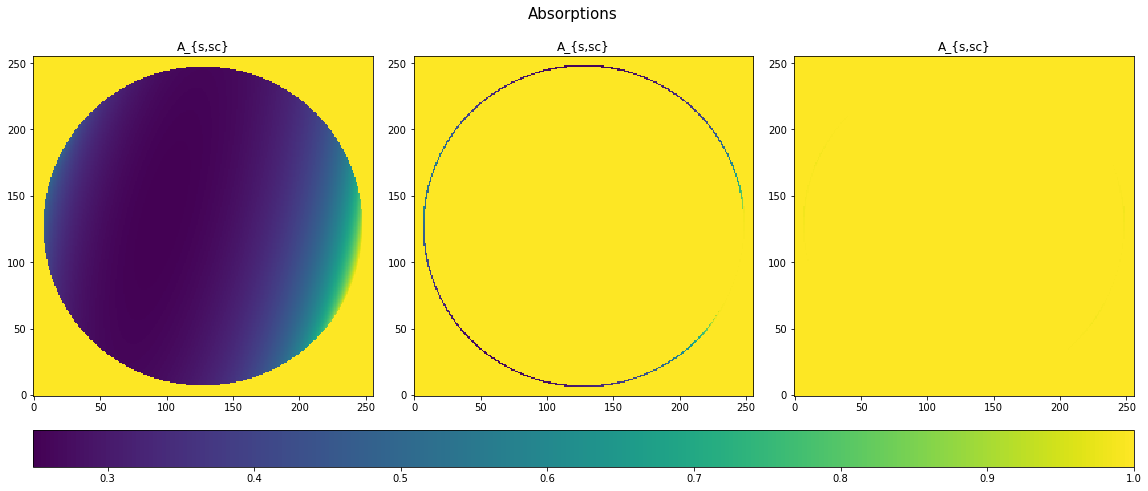

In [174]:
fig, axs = implot(values, cmap=cmp, titles=absorption_titles, suptitle="Absorptions")

In [3]:
def filename_for(mode,res,n,m,k,name):
    return f"[mode={mode}] [dim=({res},{n},{m},{k})] {name}.txt"

In [4]:
def dict_printer(d, level, indent, justify=False):
    max_len_k = max([len(k) for k in d.keys()])# + level*len(indent)
    l_indent = int(level>0)*"\n"
    lws = level*indent
    if (justify):
        return l_indent + "\n".join([f"{lws}{k.ljust(max_len_k)}" + f": {v}" for k,v in d.items()])
    else:
        return l_indent + "\n".join([f"{lws}{k}" + f": {(max_len_k-len(k))*' '}{v}" for k,v in d.items()])       

In [5]:
def compare_res(arr, resolutions, mode, logy=False, color="darkblue"):
    if mode==1: pass

    if isinstance(color, str) and not color[0]=="#":
            color = matplotlib.colors.cnames[color]

    fig,axs = plt.subplots(ncols=3, figsize=(16,4))
    for i,res in enumerate(resolutions):
        for case in range(3):
            color_i = np.array(matplotlib.colors.to_rgba(color)) * [1,1,1,resolutions[i]/max(resolutions)]
            arr[i][mode].iloc[:,case].plot(
                logy=logy, ax=axs[case], title=f"{colnames[case]}", color=tuple(color_i))
            axs[case].legend(resolutions)
    return fig,axs

#### Classes

In [7]:
class Structure():
    def __init__(self,parent,top,bottom,join,modes):
        self.parent = parent
        self.top = top
        self.bottom = bottom
        self.join = join
        self.modes = modes
        
    def dir_output_folder(self, mode):
        return os.path.join(self.parent, self.top, self.join, "Output", self.bottom, self.modes[mode])
    
    def dir_output(self):
        return os.path.join(self.parent, self.top, self.join, "Output")
    
    def dir_input(self):
        return os.path.join(self.parent, self.top, self.join, "Input")
    
    def dir_settings(self):
        return os.path.join(self.parent, self.top, self.join, "Settings")

In [8]:
class Dirset():
    def __init__(self,structure:Structure):
        self.settings = structure.dir_settings()
        self.input = structure.dir_input()
        self.output = structure.dir_output()

In [9]:
indent  = 3*" "
justify = True

class Absorption():
    def __init__(self, d):self.__dict__ = d
    def __repr__(self):
        return dict_printer(self.__dict__, 2, indent, justify)
            
class Angle():
    def __init__(self, d): self.__dict__ = d
    def __repr__(self):
        return dict_printer(self.__dict__, 2, indent, justify)
    
class Detector():
    def __init__(self, d):
            for k,v in {"offset":"offset", "resolution":"resolution", "pxsize":"pixelSize"}.items():
                self.__dict__[k] = np.array([d[v]["x"], d[v]["y"]])
            self.dist = d["distToSample"]
    def __repr__(self):
        return dict_printer(self.__dict__, 2, indent, justify)

class Ray():
    def __init__(self, d):
            for k,v in {"offset":"offset", "dim":"dimensions"}.items():
                self.__dict__[k] = np.array([d[v]["x"], d[v]["y"]])
            if ("intensity" in d.keys()):
                self.intensity = d["intensity"]
            self.profile = d["profile"]
    def __repr__(self):
        return dict_printer(self.__dict__, 2, indent, justify)
            
class Sample():
    def __init__(self, d): self.__dict__ = d
    def __repr__(self):
        return dict_printer(self.__dict__, 2, indent, justify)
         
        
class Metadata():
    def __init__(self, d): self.__dict__ = d

    def __repr__(self):
        return dict_printer(self.__dict__, 1, indent, justify)
    
class Properties():
    def __init__(self, d):
        self.absorption = Absorption(d["absorption"])
        self.angle = Angle(d["angle"])
        self.detector = Detector(d["detector"])
        self.ray = Ray(d["ray"])
        self.sample = Sample(d["sample"])

    def __repr__(self):
        return dict_printer(self.__dict__, 1, indent, justify)
    
class Preset():
    def __init__(self, arg):
        if isinstance(arg, str):
            with open(arg, "r") as f:
                d = json.load(f)
        elif isinstance(arg, dict):
            d = arg
        else:
            raise ValueError("arg must be dictionary or string (filepath).")
            
        self.metadata = Metadata(d["metadata"])
        self.properties = Properties(d["properties"])
        
    def __repr__(self):
        return dict_printer(self.__dict__, 0, indent, justify)

In [15]:
class Configset():
    def __init__(self, preset, structure, filename):
        self.structure = structure
        self.dirs = Dirset(structure)
        self.preset = preset
        self.filename = filename

    def load_data(self, line_sep="\t"):
        # filenames (angle, output)
        angle_path = os.path.join(self.dirs.input, self.preset.properties.angle.pathToAngleFile+".txt")
        angles_len = len(Configset.load_angles(angle_path))
        
        path_point = os.path.join(self.structure.dir_output_folder(0), filename_for(
            mode = 0,
            res = self.preset.properties.sample.gridResolution,
            n = angles_len,
            m = 1,
            k = 1,
            name = self.filename
        ))
        path_plane = os.path.join(self.structure.dir_output_folder(1), filename_for(
            mode = 1,
            res = self.preset.properties.sample.gridResolution,
            n = self.preset.properties.detector.resolution[0],
            m = self.preset.properties.detector.resolution[1],
            k = 1,
            name = self.filename
        ))
        path_integ = os.path.join(self.structure.dir_output_folder(2), filename_for(
            mode = 2,
            res = self.preset.properties.sample.gridResolution,
            n = angles_len,
            m = 1,
            k = self.preset.properties.angle.angleCount,
            name = self.filename
        ))
        
        output_point = None
        output_plane = None
        output_integ = None
        
        if (os.path.exists(path_point)):
            output_point = Configset.load_csv(path_point)
        else: 
            print(f"point data at \'{path_point}\' not found")
        if (os.path.exists(path_plane)):
            output_plane = Configset.load_arr(path_plane, line_sep)
        else: 
            print(f"plane data at \'{path_plane}\' not found")
        if (os.path.exists(path_integ)):
            output_integ = Configset.load_csv(path_integ)
        else:
            print(f"integ data at \'{path_integ}\' not found")

        return output_point, output_plane, output_integ
    
    def load_csv(filepath):
        df = pd.read_csv(filepath, sep="\t", index_col=0)
        return df.reindex(["A_{"+ f"{a},{b}" + "}" for a,b in [("s","sc"), ("c","sc"), ("c","c")]], axis=1)
    
    def load_arr(filepath, line_sep="\t"):
        with open(filepath, "r") as f:
            lines = f.readlines()
        lines = [line.replace("\n", "").replace(" ", "") for line in lines]
        return np.array([[l[1:-1].split(",") for l in line.split(line_sep)] for line in lines]).astype(float)
    
    def load_angles(filepath):
        return pd.read_csv(filepath, index_col=0, header=None).index

### Data paths

#### Generated

In [16]:
S = {}
S["A"] = Structure(
    parent = os.path.split(os.getcwd())[0],
    top    = "fopra_absorb_backup",
    bottom = "t6",
    join   = "UnityStuff",
    modes  = ["Absorptions"+s for s in ["2D", "3D", "Integrated"]]
)

S["B"] = copy(S["A"])
S["B"].top = "fopra_absorb"
S["B"].bottom = "B"

S["ref"] = copy(S["B"])
S["ref"].bottom = os.path.join("testing", "ref")
S["ref"].modes = 3*[""]

S["ref_ray"] = copy(S["ref"])
S["ref_ray"].bottom = os.path.join("testing", "ref ray")

In [17]:
D = {k:Dirset(v) for k,v in S.items()}

In [18]:
resolutions = [180, 500, 800]

In [19]:
P = {}
P["A"] = Preset(os.path.join(D["A"].settings, "t6.json"))
P["B"] = Preset(os.path.join(D["B"].settings, "B.json"))
for res in resolutions:
    P[f"ref{res}"] = Preset(os.path.join(D["ref"].settings, "ref.json"))
    P[f"ref{res}"].properties.sample.gridResolution = res
    P[f"ref{res}_ray"] = Preset(os.path.join(D["ref"].settings, "ref ray.json"))
    P[f"ref{res}_ray"].properties.sample.gridResolution = res

In [20]:
#C = {k:Configset(preset=P[k], structure=S[k], filename="Output") for k in P.keys()}
C = {
    "A" : Configset(P["A"], S["A"], "Output"),
    "B" : Configset(P["B"], S["B"], "Output"),
}
for res in resolutions:
    C[f"ref{res}"] = Configset(P[f"ref{res}"], S["ref"], "Output")
    C[f"ref{res}_ray"] = Configset(P[f"ref{res}_ray"], S["ref_ray"], "Output")

#### Reference

In [25]:
path_point_ref = os.path.join(
    os.getcwd(), "UnityStuff", "Output", "AbsorptionsIntegrated", "output_wide2_1.txt")

In [26]:
path_point_ref_ray = os.path.join(
    os.getcwd(), "UnityStuff", "Output", "AbsorptionsIntegrated", "output_veryNarrow2_1.txt")

In [27]:
path_integrated_ref = os.path.join(
    os.getcwd(), "UnityStuff", "Output", "AbsorptionsIntegrated", 
    "output_wideAngle_Int.txt"
#    "output_wide2_int_1.txt"
)

In [28]:
path_integrated_ref_ray = os.path.join(
    os.getcwd(), "UnityStuff", "Output", "AbsorptionsIntegrated", "output_narrow2_int_1.txt")

In [29]:
path_area_ref = os.path.join(
    os.getcwd(), "UnityStuff", "Output", "Absorptions3D", "output_wide2_area.txt")

In [30]:
path_area_ref_ray = os.path.join(
    os.getcwd(), "UnityStuff", "Output", "Absorptions3D", "output_narrow2_area.txt")

In [31]:
paths = [path_point_ref, None, path_integrated_ref]
paths_ray = [path_point_ref_ray, None, path_integrated_ref_ray]

In [32]:
colnames = np.array(["A_{"+ f"{a},{b}" + "}" for a,b in [("s","sc"), ("c","sc"), ("c","c")]])

### Data

#### Generated

In [458]:
OA = C["A"].load_data()
OB = C["B"].load_data()
Orefs = [C[f"ref{res}"].load_data() for res in [180,800]]
Orefs_ray = [C[f"ref{res}_ray"].load_data() for res in [180,800]]

point data at 'C:\Users\Seve\Documents\programming\C# projects\fopra_absorb\UnityStuff\Output\B\Absorptions2D\[mode=0] [dim=(60,5821,1,1)] Output.txt' not found
plane data at 'C:\Users\Seve\Documents\programming\C# projects\fopra_absorb\UnityStuff\Output\B\Absorptions3D\[mode=1] [dim=(60,256,256,1)] Output.txt' not found
integ data at 'C:\Users\Seve\Documents\programming\C# projects\fopra_absorb\UnityStuff\Output\B\AbsorptionsIntegrated\[mode=2] [dim=(60,5821,1,30)] Output.txt' not found
plane data at 'C:\Users\Seve\Documents\programming\C# projects\fopra_absorb\UnityStuff\Output\testing\ref\[mode=1] [dim=(800,256,256,1)] Output.txt' not found
plane data at 'C:\Users\Seve\Documents\programming\C# projects\fopra_absorb\UnityStuff\Output\testing\ref ray\[mode=1] [dim=(800,256,256,1)] Output.txt' not found


#### Reference

In [34]:
ref = 3*[pd.DataFrame()]
ref_ray = 3*[pd.DataFrame()]

In [35]:
def subf(s):
    return s[1:-1].split(",")[0]

def read_listlike(path, sep="\t", scalar_index=True, subselect_fun=subf):
    var = pd.read_csv(path, sep=sep, index_col=0)
    if not scalar_index:
        var.index = np.array([subselect_fun(s) for s in var.index]).astype(float)
    var.columns = colnames[[0,2,1]]
    var = var.reindex(colnames, axis=1)
    return var

In [36]:
ref[0] = read_listlike(paths[0])
ref[2] = read_listlike(paths[2], scalar_index=0)

ref_ray[0] = read_listlike(paths_ray[0])
ref_ray[2] = read_listlike(paths_ray[2], scalar_index=0)

In [37]:
ref_ray_old = pd.read_csv(path_integrated_ref_ray_old, sep="\t", index_col=0)
ref_ray_old.index = np.array([s[1:-1].split(",")[0] for s in ref_ray_old.index]).astype(float)
ref_ray_old.columns = colnames[[0,2,1]]
ref_ray_old = ref_ray_old.reindex(colnames, axis=1)

NameError: name 'path_integrated_ref_ray_old' is not defined

In [974]:
angles = np.linspace(0.8,59,57)

In [975]:
angles

array([ 0.8       ,  1.83928571,  2.87857143,  3.91785714,  4.95714286,
        5.99642857,  7.03571429,  8.075     ,  9.11428571, 10.15357143,
       11.19285714, 12.23214286, 13.27142857, 14.31071429, 15.35      ,
       16.38928571, 17.42857143, 18.46785714, 19.50714286, 20.54642857,
       21.58571429, 22.625     , 23.66428571, 24.70357143, 25.74285714,
       26.78214286, 27.82142857, 28.86071429, 29.9       , 30.93928571,
       31.97857143, 33.01785714, 34.05714286, 35.09642857, 36.13571429,
       37.175     , 38.21428571, 39.25357143, 40.29285714, 41.33214286,
       42.37142857, 43.41071429, 44.45      , 45.48928571, 46.52857143,
       47.56785714, 48.60714286, 49.64642857, 50.68571429, 51.725     ,
       52.76428571, 53.80357143, 54.84285714, 55.88214286, 56.92142857,
       57.96071429, 59.        ])

### Comparisons

#### List data

##### Compare by source

In [488]:
figs = {}

In [489]:
OA = C["A"].load_data()
OB = C["B"].load_data()
Orefs = [C[f"ref{res}"].load_data() for res in resolutions]
Orefs_ray = [C[f"ref{res}_ray"].load_data() for res in resolutions]

point data at 'C:\Users\Seve\Documents\programming\C# projects\fopra_absorb\UnityStuff\Output\B\Absorptions2D\[mode=0] [dim=(60,5821,1,1)] Output.txt' not found
plane data at 'C:\Users\Seve\Documents\programming\C# projects\fopra_absorb\UnityStuff\Output\B\Absorptions3D\[mode=1] [dim=(60,256,256,1)] Output.txt' not found
integ data at 'C:\Users\Seve\Documents\programming\C# projects\fopra_absorb\UnityStuff\Output\B\AbsorptionsIntegrated\[mode=2] [dim=(60,5821,1,30)] Output.txt' not found
plane data at 'C:\Users\Seve\Documents\programming\C# projects\fopra_absorb\UnityStuff\Output\testing\ref\[mode=1] [dim=(500,256,256,1)] Output.txt' not found
plane data at 'C:\Users\Seve\Documents\programming\C# projects\fopra_absorb\UnityStuff\Output\testing\ref\[mode=1] [dim=(800,256,256,1)] Output.txt' not found
plane data at 'C:\Users\Seve\Documents\programming\C# projects\fopra_absorb\UnityStuff\Output\testing\ref ray\[mode=1] [dim=(500,256,256,1)] Output.txt' not found
plane data at 'C:\Users\Se

###### Point mode

In [473]:
def plot_add_ref(fig, axs, mode, data, resolutions, color="redorange"):
    for i in range(3):
        data[mode].iloc[:,i].plot(ax=axs[i], color=color)
        axs[i].legend([f"res={res}" for res in resolutions]+["reference"])
    return fig,axs

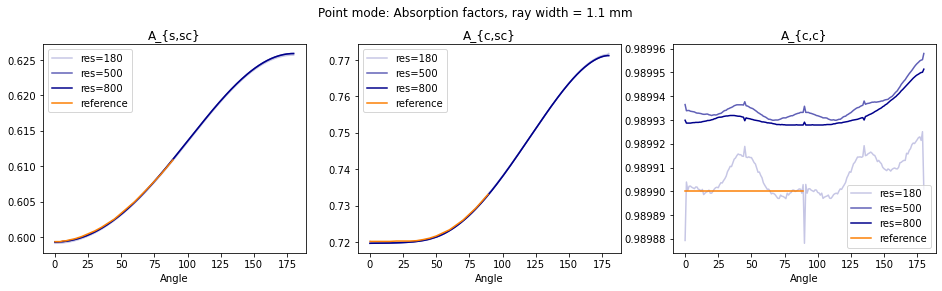

In [490]:
mode = 0
resolutions_local = resolutions
fig,axs = compare_res(Orefs, resolutions_local, mode, logy=0)
fig,axs = plot_add_ref(fig, axs, mode, ref, resolutions_local, color="#fc7f03")
fig.suptitle("Point mode: Absorption factors, ray width = 1.1 mm")
fig.subplots_adjust(top=0.85)

figs.update({"[mode=0] [preset=ref] absorption factors comparison.pdf" : fig})

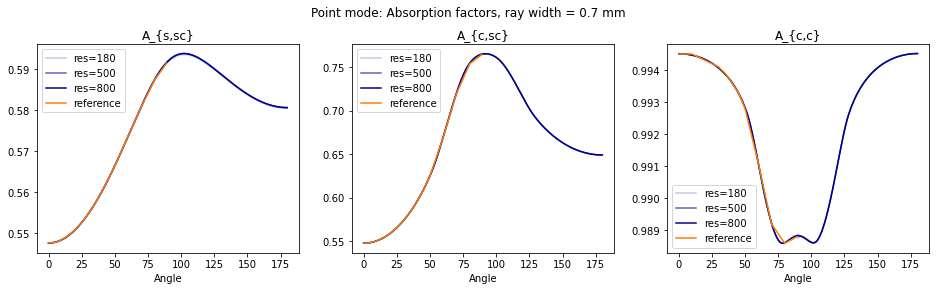

In [491]:
mode = 0
resolutions_local = resolutions
fig,axs = compare_res(Orefs_ray, resolutions, mode, logy=0)
fig,axs = plot_add_ref(fig, axs, mode, ref_ray, resolutions_local, color="#fc7f03")
fig.suptitle("Point mode: Absorption factors, ray width = 0.7 mm")
fig.subplots_adjust(top=0.85)

figs.update({"[mode=0] [preset=ref ray] absorption factors comparison.pdf" : fig})

###### Integrated mode

In [450]:
path_integ_vcos = os.path.join(
    os.getcwd(), "UnityStuff", "Output", "testing", "ref", "[mode=2] vcosinv.txt")

In [451]:
integ_vcos = load(path_integ_vcos, line_sep="\t", scalar=1)[-30:,:]

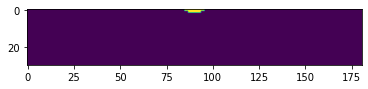

In [452]:
plt.imshow((integ_vcos>10))

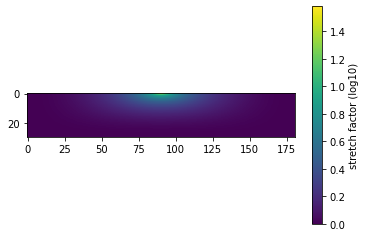

In [456]:
plt.imshow(np.log10(integ_vcos[-30:,:][:,::-1]))
plt.colorbar().set_label("stretch factor (log10)")

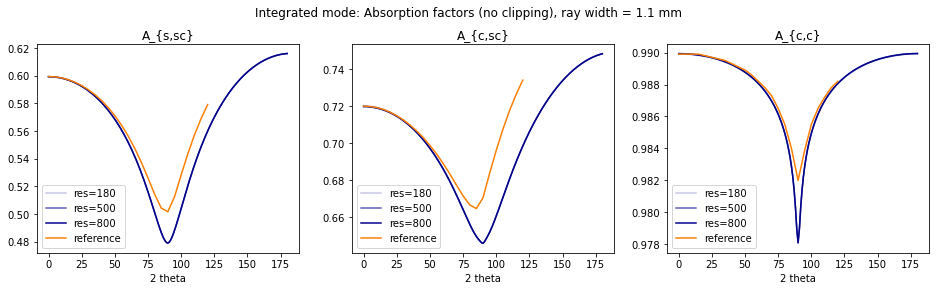

In [492]:
mode = 2
resolutions_local = resolutions
fig,axs = compare_res(Orefs, resolutions, mode, logy=0)
fig,axs = plot_add_ref(fig, axs, mode, ref, resolutions_local, color="#fc7f03")
fig.suptitle("Integrated mode: Absorption factors (no clipping), ray width = 1.1 mm")
fig.subplots_adjust(top=0.85)

figs.update({"[mode=2] [preset=ref] absorption factors comparison (no clipping).pdf" : fig})

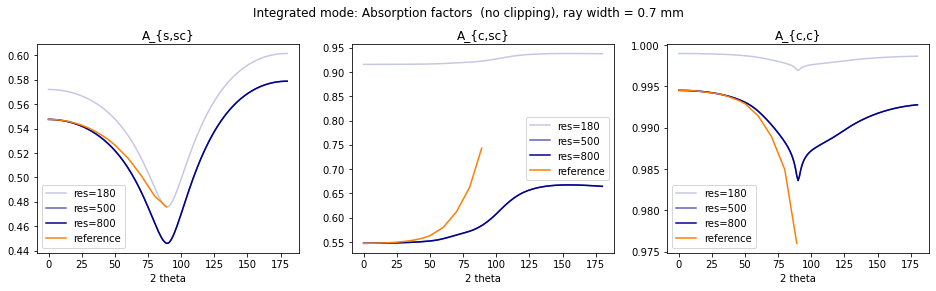

In [493]:
mode = 2
resolutions_local = resolutions
fig,axs = compare_res(Orefs_ray, resolutions, mode, logy=0)
fig,axs = plot_add_ref(fig, axs, mode, ref_ray, resolutions_local, color="#fc7f03")
fig.suptitle("Integrated mode: Absorption factors  (no clipping), ray width = 0.7 mm")
fig.subplots_adjust(top=0.85)

figs.update({"[mode=2] [preset=ref ray] absorption factors comparison  (no clipping).pdf" : fig})

##### Compare by property

###### Point mode

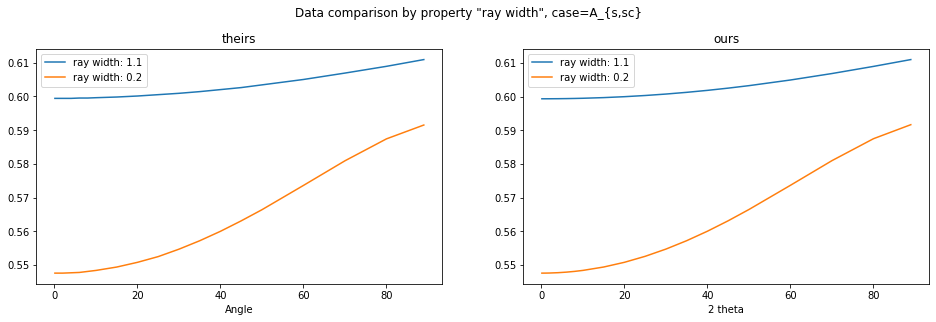

In [286]:
mode = 0
case = 0
res_i = -1
property_name = "ray width"
property_values = [1.1, 0.2]

fig,axs = plt.subplots(ncols=2, figsize=(16,4.5))
fig.suptitle(f"Data comparison by property \"{property_name}\", case={colnames[case]}", fontdict={"fontsize":14});
fig.subplots_adjust(top=0.85)

ref[mode].iloc[:,case].plot(ax=axs[0])
ref_ray[mode].iloc[:,case].plot(ax=axs[0])
axs[0].legend(["{}: {}".format(property_name, v) for v in property_values])
axs[0].set_title("theirs");

Orefs[res_i][mode].iloc[:,case].plot(ax=axs[1])
Orefs_ray[res_i][mode].iloc[:,case].plot(ax=axs[1])
axs[1].legend(["{}: {}".format(property_name, v) for v in property_values])
axs[1].set_title("ours");

###### Integrated mode

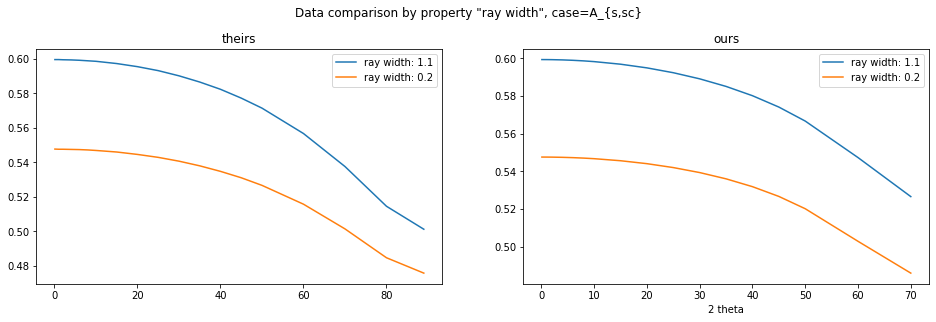

In [283]:
mode = 2
case = 0
res_i = -1
property_name = "ray width"
property_values = [1.1, 0.2]

fig,axs = plt.subplots(ncols=2, figsize=(16,4.5))
fig.suptitle(f"Data comparison by property \"{property_name}\", case={colnames[case]}", fontdict={"fontsize":14});
fig.subplots_adjust(top=0.85)

ref[mode].iloc[:,case].plot(ax=axs[0])
ref_ray[mode].iloc[:,case].plot(ax=axs[0])
axs[0].legend(["{}: {}".format(property_name, v) for v in property_values])
axs[0].set_title("theirs");

Orefs[res_i][mode].iloc[:,case].plot(ax=axs[1])
Orefs_ray[res_i][mode].iloc[:,case].plot(ax=axs[1])
axs[1].legend(["{}: {}".format(property_name, v) for v in property_values])
axs[1].set_title("ours");

#### Array data

In [377]:
path_plane_vcos = os.path.join(
    os.getcwd(), "UnityStuff", "Output", "testing", "ref", "[mode=1] vcosinv.txt")

In [378]:
plane_vcos = load(path_plane_vcos, line_sep="\t", scalar=1)

###### Compare by property

In [384]:
ref[1] = [load(path=path_area_ref.replace(".txt", f"{i}.txt"), line_sep="\t", skiplines=1, scalar=1) for i in range(3)]
ref_ray[1] = [load(path=path_area_ref_ray.replace(".txt", f"{i}.txt"), line_sep="\t", skiplines=1, scalar=1) for i in range(3)]
ref[1] = np.stack(ref[1], axis=2).reshape((256,256,-1))
ref_ray[1] = np.stack(ref_ray[1], axis=2).reshape((256,256,-1))

In [270]:
det256 = pd.read_csv(os.path.join(
    os.getcwd(), "UnityStuff", "Output", "testing", "det256", "[mode=0] [dim=(800,256,1,1)] Output.txt"),
    index_col=0, sep="\t"
)

In [385]:
data = [Orefs[0][1], Orefs_ray[0][1]]
ref_data = [ref[1], ref_ray[1]]

In [135]:
data[0]

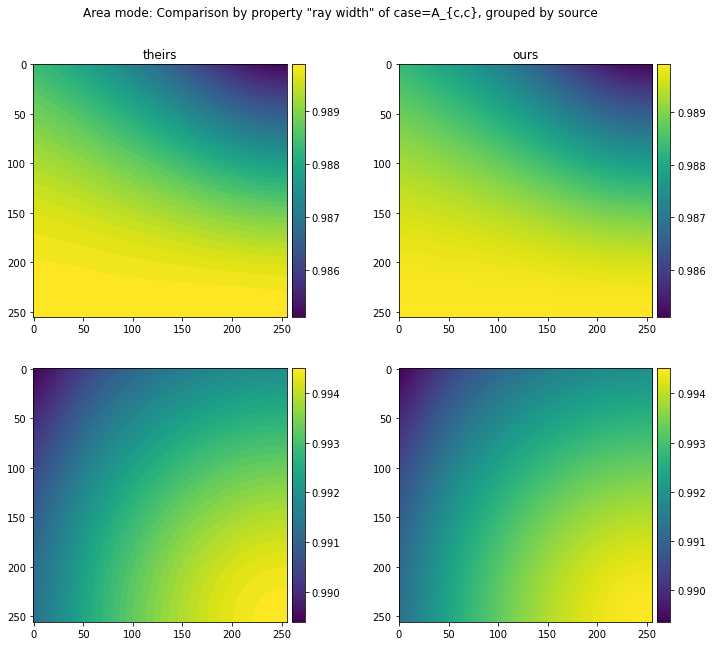

In [392]:
case = 2

property_name = "ray width"
property_values = [1.1, 0.2]

fig,axs = plt.subplots(ncols=2, nrows=2, figsize=(12,10))
fig.suptitle(f"Area mode: Comparison by property \"{property_name}\" of case={colnames[case]}, grouped by source", 
    fontdict={"size":14});
fig.subplots_adjust(top=0.9)

axs[0,0].set_title("theirs")
axs[0,1].set_title("ours")

ims = [axs[i,0].imshow(ref_data[i][:,:,case]) for i in range(2)] + [axs[i,1].imshow(data[i][:,:,case]) for i in range(2)]
divs = [make_axes_locatable(axs[i,0]) for i in range(2)] + [make_axes_locatable(axs[i,1]) for i in range(2)]
caxs = [divs[i].append_axes("right", size="5%", pad=0.07) for i in range(4)]
for i in range(4):
    plt.colorbar(ims[i], cax=caxs[i])

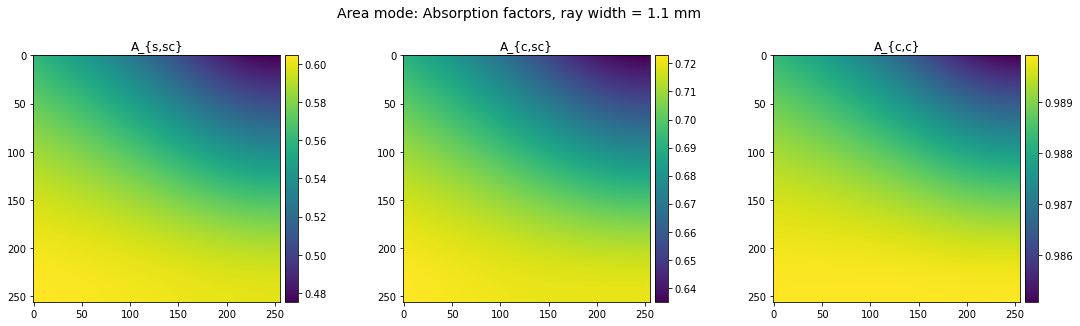

In [494]:
fig,axs = plt.subplots(ncols=3, figsize=(18,5))
ims = [axs[i].imshow((data[0])[:,:,i], cmap=cm.viridis) for i in range(3)]
divs = [make_axes_locatable(axs[i]) for i in range(3)]
caxs = [divs[i].append_axes("right", size="5%", pad=0.07) for i in range(3)]
for i in range(3):
    axs[i].set_title(colnames[i])
    plt.colorbar(ims[i], cax=caxs[i])
plt.suptitle("Area mode: Absorption factors, ray width = 1.1 mm", size=14, fontdict={"size":14});
plt.subplots_adjust(wspace=0.4)

figs.update({"[mode=1] [preset=ref] absorption factors.pdf" : fig})

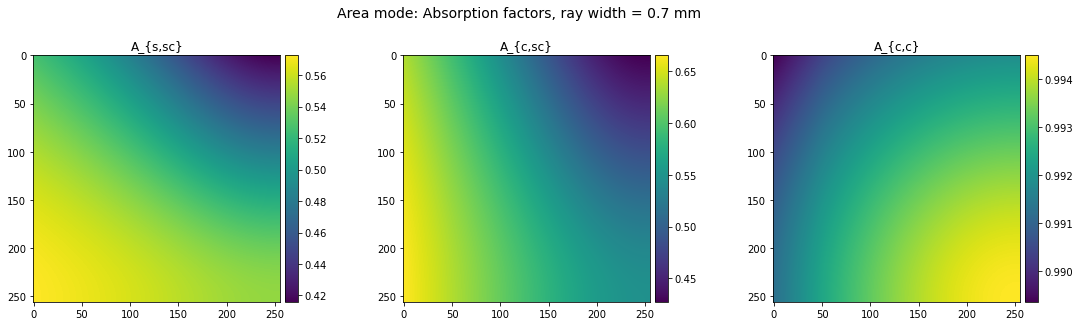

In [495]:
fig,axs = plt.subplots(ncols=3, figsize=(18,5))
ims = [axs[i].imshow((data[1])[:,:,i], cmap=cm.viridis) for i in range(3)]
divs = [make_axes_locatable(axs[i]) for i in range(3)]
caxs = [divs[i].append_axes("right", size="5%", pad=0.07) for i in range(3)]
for i in range(3):
    axs[i].set_title(colnames[i])
    plt.colorbar(ims[i], cax=caxs[i])
plt.suptitle("Area mode: Absorption factors, ray width = 0.7 mm", size=14, fontdict={"size":14});
plt.subplots_adjust(wspace=0.4)

figs.update({"[mode=1] [preset=ref ray] absorption factors.pdf" : fig})

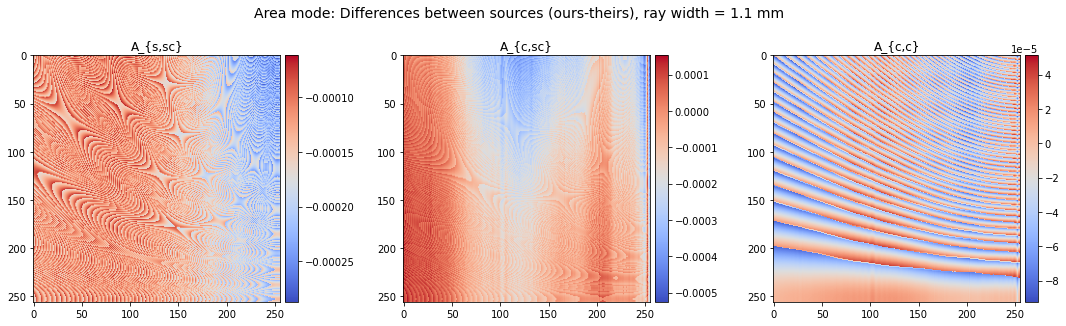

In [496]:
fig,axs = plt.subplots(ncols=3, figsize=(18,5))
ims = [axs[i].imshow((data[0]-ref_data[0])[:,:,i], cmap=cm.coolwarm) for i in range(3)]
divs = [make_axes_locatable(axs[i]) for i in range(3)]
caxs = [divs[i].append_axes("right", size="5%", pad=0.07) for i in range(3)]
for i in range(3):
    axs[i].set_title(colnames[i])
    plt.colorbar(ims[i], cax=caxs[i])
plt.suptitle("Area mode: Differences between sources (ours-theirs), ray width = 1.1 mm", size=14, fontdict={"size":14});
plt.subplots_adjust(wspace=0.4)

figs.update({"[mode=1] [preset=ref] source differences.pdf" : fig})

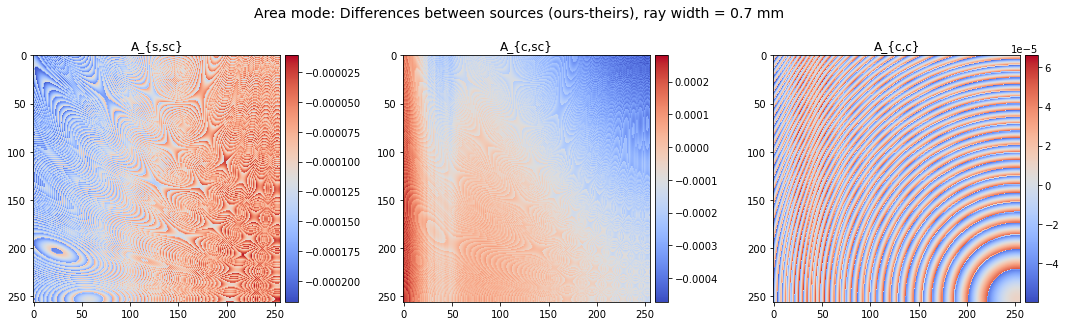

In [497]:
fig,axs = plt.subplots(ncols=3, figsize=(18,5))
ims = [axs[i].imshow((data[1]-ref_data[1])[:,:,i], cmap=cm.coolwarm) for i in range(3)]
divs = [make_axes_locatable(axs[i]) for i in range(3)]
caxs = [divs[i].append_axes("right", size="5%", pad=0.07) for i in range(3)]
for i in range(3):
    axs[i].set_title(colnames[i])
    plt.colorbar(ims[i], cax=caxs[i])
plt.suptitle("Area mode: Differences between sources (ours-theirs), ray width = 0.7 mm", size=14, fontdict={"size":14});
plt.subplots_adjust(wspace=0.4)

figs.update({"[mode=1] [preset=ref ray] source differences.pdf" : fig})

In [354]:
#from scipy.ndimage import gaussian_filter,median_filter

In [499]:
plot_dir = os.path.join(os.getcwd(), "plots", "2020-11-09")
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

for k,v in figs.items():
    if k.startswith("[mode=0]") or k.startswith("[mode=2]"):
        v.savefig(os.path.join(plot_dir, k), dpi=300, bbox_inches = 'tight', pad_inches = 1/2.54 * 0.5)

###### Compare by source

Completed mode. Not necessary anymore.

###### Compare to integrated mode

In [418]:
path_thetas = os.path.join(os.getcwd(), "UnityStuff", "Input", "det256.txt")
path_point = os.path.join(os.getcwd(), "UnityStuff", "Output", "testing", "det256", "[mode=0] [dim=(800,256,1,1)] Output.txt")
path_area = os.path.join(os.getcwd(), "UnityStuff", "Output", "testing", "det256", "[mode=1] [dim=(180,256,256,1)] Output.txt")

In [439]:
df_angles = pd.read_csv(path_thetas, index_col=0, header=None)

In [420]:
area = load(path_area, line_sep="\t")

In [437]:
dfa = pd.DataFrame(data=area[-2,:,:], index=df_angles.index, columns=colnames)

In [422]:
dfp = pd.read_csv(path_point, sep="\t", index_col=0)
dfp.index = dfa.index[::-1]

In [426]:
dfa_ref = pd.DataFrame(data=ref[1][-2,:,:], index=df_angles.index, columns=colnames)

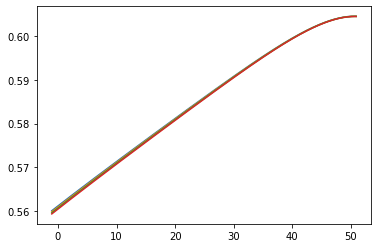

In [449]:
for i in range(1,5):
    plt.plot(df_angles.index, area[:,i,0])

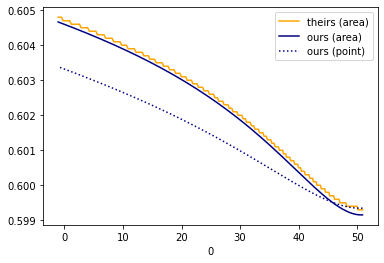

In [444]:
case = 0
sl = slice(None,None)
dfa_ref[dfa.columns[case]].iloc[sl].plot(color="orange")
dfa[dfa.columns[case]].iloc[sl].plot(color="navy")
dfp[dfa.columns[case]].iloc[sl].plot(style=":", color="navy")
plt.legend(["theirs (area)", "ours (area)", "ours (point)"])

In [9]:
dfi_ref = pd.read_csv(path_integrated_ref, sep="\t", index_col=0)
dfi_ref.index = np.linspace(0, 59, dfi_ref.shape[0])

In [20]:
dfi = pd.read_csv(path_integrated, sep="\t", index_col=0)
dfi.index = dfa_angles

dfi_ref = dfi_ref.reindex(dfi.columns, axis=1)

In [253]:
dfi_backup = dfi

In [282]:
(dfi == dfi_backup).all()

A_{s,sc}    True
A_{c,sc}    True
A_{c,c}     True
dtype: bool

In [274]:
dfa_angles = np.concatenate([np.linspace(0, 10, 3000), np.linspace(15, np.rad2deg(np.arccos(240.18 / np.sqrt(409.6**2 + 240.18**2))), 200)])

In [ ]:
dfa_angles

In [275]:
with open("angles_low.txt", "w") as f:
    f.writelines("\n".join([str(v) for v in dfa_angles]))

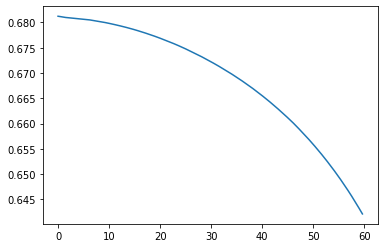

In [21]:
dfi[dfi.columns[1]].plot()

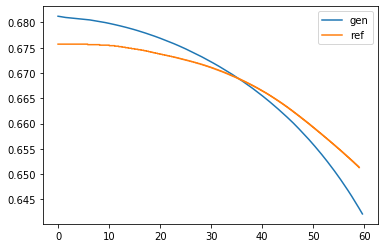

In [25]:
i = 1
sl = slice(0,None)
(dfi[dfi.columns[i]].iloc[sl]).plot()
(dfi_ref[dfi.columns[i]].iloc[sl]).plot()
plt.legend(["gen", "ref"])

In [245]:
np.rad2deg([-0.0195661593933375, 1.03540405352267])

array([-1.12105835, 59.32428236])

In [252]:
np.rad2deg(np.arccos(1/1.03))

13.862432116433846

In [235]:
np.rad2deg(np.arctan((0-4.7)/240.18))

-1.121058365823919

In [ ]:
os.path.

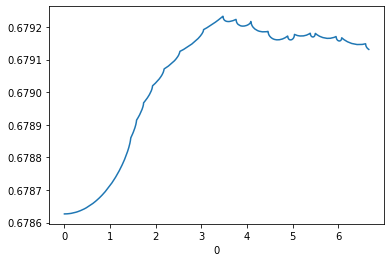

In [306]:
i = 1
sl = slice(0,2000)
dfp[dfp.columns[i]].iloc[sl].plot()

In [75]:
(dfi-dfi_ref).abs().max()

A_{s,sc}    0.011778
A_{c,sc}    0.008554
A_{c,c}     0.000324
dtype: float64

In [93]:
inclusive =  np.linspace(0,90,31)

In [91]:
centered = np.linspace(1.5, 88.5, 30)

In [96]:
np.cos(np.deg2rad(inclusive))

array([1.00000000e+00, 9.98629535e-01, 9.94521895e-01, 9.87688341e-01,
       9.78147601e-01, 9.65925826e-01, 9.51056516e-01, 9.33580426e-01,
       9.13545458e-01, 8.91006524e-01, 8.66025404e-01, 8.38670568e-01,
       8.09016994e-01, 7.77145961e-01, 7.43144825e-01, 7.07106781e-01,
       6.69130606e-01, 6.29320391e-01, 5.87785252e-01, 5.44639035e-01,
       5.00000000e-01, 4.53990500e-01, 4.06736643e-01, 3.58367950e-01,
       3.09016994e-01, 2.58819045e-01, 2.07911691e-01, 1.56434465e-01,
       1.04528463e-01, 5.23359562e-02, 6.12323400e-17])

In [99]:
np.cos(np.deg2rad(centered))

array([0.99965732, 0.99691733, 0.99144486, 0.98325491, 0.97236992,
       0.95881973, 0.94264149, 0.92387953, 0.90258528, 0.87881711,
       0.85264016, 0.82412619, 0.79335334, 0.76040597, 0.72537437,
       0.68835458, 0.64944805, 0.60876143, 0.56640624, 0.52249856,
       0.47715876, 0.4305111 , 0.38268343, 0.33380686, 0.28401534,
       0.23344536, 0.18223553, 0.13052619, 0.0784591 , 0.02617695])

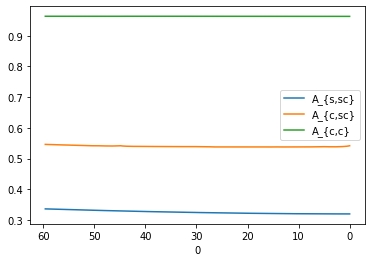

In [1192]:
dfa.plot()
plt.gca().invert_xaxis()

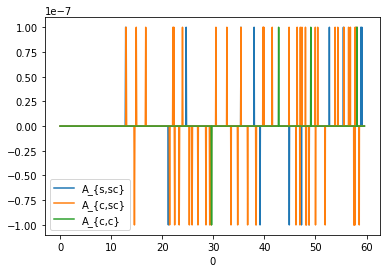

In [1205]:
(dfa-dfp).round(7).plot()

In [1184]:
diff_integrated_area = np.repeat(np.array(dfa).reshape(1,1024,3), 1024, 0)[:,::-1,:] - area

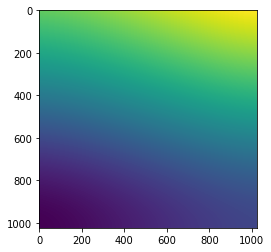

In [1185]:
plt.imshow(diff_integrated_area[:,:,0])

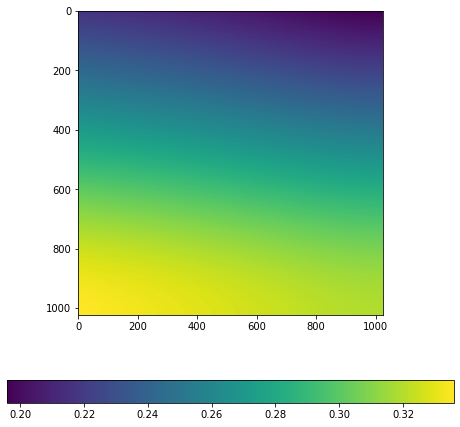

In [1180]:
i = 0
plt.figure(figsize=(8,8))
plt.imshow(area[:,:,i])
#plt.gca().invert_xaxis()
plt.colorbar(orientation="horizontal")

In [4]:
def thetas_from_geom(dimensions, offset, pxsize):
    det = np.arange((dimensions[0]).astype(int))
    ratios = np.sqrt((det[::-1]*pxsize - offset[0])**2 + offset[2]**2) / offset[2]
    return np.rad2deg(np.arccos(1.0/ratios))

def get_ring_coordinates(theta, steps, start, end, offset, dimensions):
    rho = np.array([np.deg2rad(i*(end-start)/(steps-1)) for i in range(steps)])
    cos = np.apply_along_axis(np.cos, 0, rho)
    sin = np.apply_along_axis(np.sin, 0, rho)
    
    thetaHypot = np.abs(offset[2] / np.cos(np.deg2rad(theta)))
    r = np.sqrt(thetaHypot**2 - offset[2]**2)
    
    x = r*cos + offset[0]
    y = r*sin + offset[1]
    
    return dimensions - np.array([x,y]).T


def co2index(co, pxsize, dimensions):
    tmp = np.floor(co/pxsize).astype(int) -1
    tmp = tmp[(tmp[:,0] >= 0) & (tmp[:,0] < dimensions[0]) & (tmp[:,1] >= 0) & (tmp[:,1] < dimensions[1])]
    
    return tmp

In [1382]:
offset = np.array([0,0,240.18])
pxsize = 0.4
dimensions = np.array([1024]*2)
dimensions_px = dimensions*pxsize
angle_start = 0
angle_end = 90

In [14]:
lines = "\n".join([f"{v:2.2f}" for v in np.arange(0.8, 59.01, 0.01)])

In [16]:
with open("angles_t4.txt", "w") as f:
    f.writelines(lines)

In [1317]:
thetas = thetas_from_geom(dimensions, offset, pxsize)

In [1405]:
det = np.indices([1024]*2)

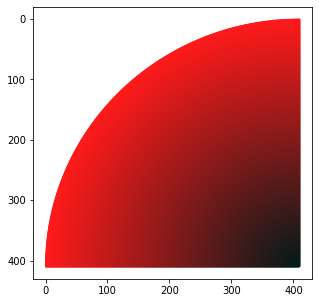

In [1448]:
plt.figure(figsize=(5,5))
for i in range(1024):
    plt.plot(CO[i,:,0], CO[i,:,1], color=[i/1024, 0.1, 0.1])
plt.gca().invert_yaxis()

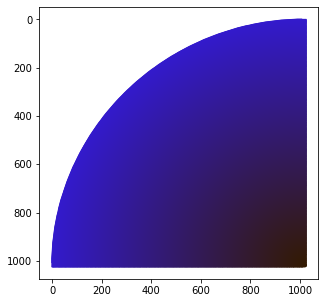

In [1451]:
plt.figure(figsize=(5,5))
for i in range(1024):
    plt.plot(IN[i][:,0], IN[i][:,1], color=[0.2, 0.1, i/1024*0.8])
plt.gca().invert_yaxis()

In [1456]:
CO = np.array([get_ring_coordinates(theta, steps, angle_start, angle_end, offset, dimensions_px)
               for theta in df_angles.index])

IN = np.array([co2index(CO[i,:,:], pxsize, dimensions) for i in range(thetas.shape[0])])

ABSP = np.array([np.mean(area[IN[i][:,0], IN[i][:,1], :], axis=0) for i in range(IN.shape[0])])

dfi_plane = pd.DataFrame(ABSP, index=df_angles.index[:], columns=dfa.columns)

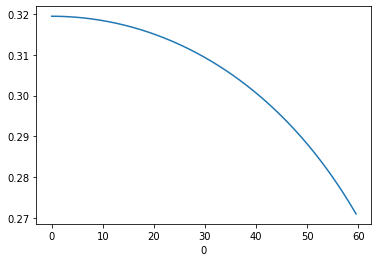

In [1454]:
dfi[dfi.columns[0]].plot()

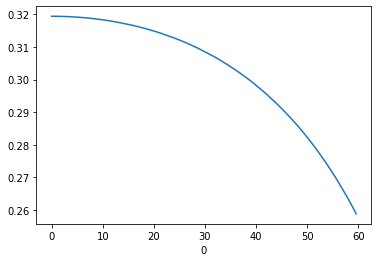

In [1457]:
dfi_plane[dfi.columns[0]].plot()

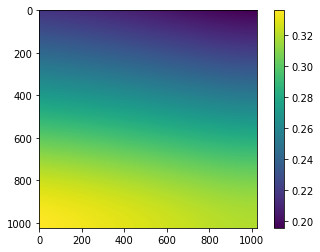

In [1432]:
i = 0
plt.imshow(area[:,:,i])
#plt.gca().invert_xaxis()
plt.colorbar()

In [1269]:
pd.isna(dfi_plane).index

Float64Index([  59.58919040496415,   59.56472232656381,  59.540218626605295,
                59.51567923622625,  59.491104086415945,   59.46649310801502,
                59.44184623171523,   59.41716338805904,   59.39244450743955,
               59.367689520100086,
              ...
               0.8587282939760209,  0.7633260342196141,  0.6679195413807832,
               0.5725093442881323, 0.47709597189006403, 0.38167995324129794,
               0.2862618174897738, 0.19084209385189937, 0.09542131158998576,
                              0.0],
             dtype='float64', length=1024)

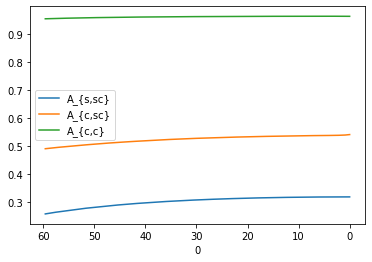

In [1458]:
case = slice(None)
dfi_plane[dfi_plane.columns[case]].plot()
plt.gca().invert_xaxis()

In [1459]:
diff = dfi -dfi_plane

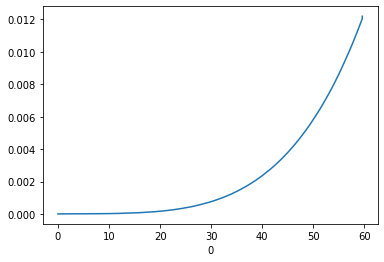

In [1464]:
case = 0
diff[dfi.columns[case]].plot()

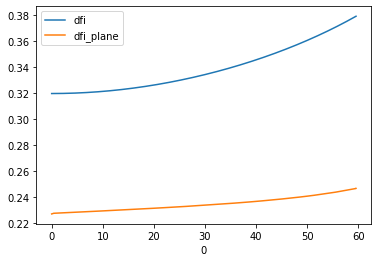

In [1367]:
case = 0
both = pd.DataFrame({"dfi":dfi.iloc[:,case], "dfi_plane":dfi_plane.iloc[:,case]})
both.plot()

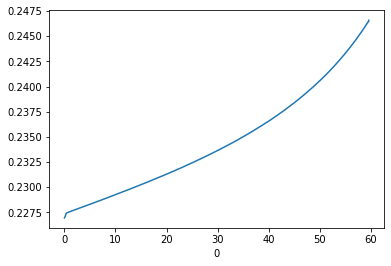

In [1368]:
case = 0
(dfi_plane)[dfi.columns[case]].plot()

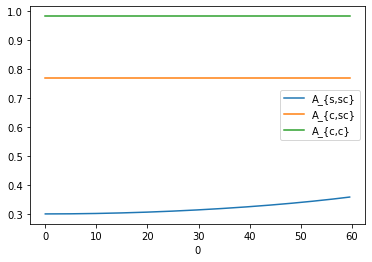

In [1280]:
dfi.plot()

### Integration rings

#### Functions

In [103]:
def x_dist(angle):
    return np.tan(angle)*240.18

In [104]:
def get_ring(origin, rotations, preset):
    v = origin
    if isinstance(v, float):
        v = np.array([x_dist(v), 0])
        
    r = np.stack([
        np.dot(rotations*[1, -1], v),
        np.dot(rotations[:,::-1], v)
    ], axis=1)

    return r

In [105]:
def plot_ring(ring, origin, preset, subplots_kwargs = {}, plot_kwargs = {}):
    v = origin
    if isinstance(v, float):
        v = np.array([x_dist(origin), 0])
    
    px = preset.properties.detector.resolution
    dbounds = np.stack([px*[0,0], px*[0,1], px*[1,1], px*[1,0]]) \
        *preset.properties.detector.pxsize - preset.properties.detector.offset
        
    fig,ax = plt.subplots(**subplots_kwargs)
    ax.set_aspect(1.0)
    ax.plot(dbounds[:,0][[0,1,2,3,0]], dbounds[:,1][[0,1,2,3,0]], "-", color="gray", **plot_kwargs)
    ax.scatter(ring[:,0], ring[:,1], s=10)
    ax.scatter(v[0], v[1], color="r")
    ax.scatter(0, 0, color="green")
    ax.annotate("offset", xy=(0,0), xytext=(15,10), 
                textcoords='offset points', ha='center', va='bottom',
                arrowprops=dict(arrowstyle='-', color='green'))

    plt.gca().invert_xaxis()
    
    return fig,ax

In [106]:
def ring_outside(ring, preset):
    px = preset.properties.detector.resolution
    pxs = preset.properties.detector.pxsize
    offset = preset.properties.detector.offset
    
    xbounds = np.array([0, px[0]])*pxs[0] - offset[0]
    ybounds = np.array([0, px[1]])*pxs[1] - offset[1]
    
    mask = (ring[:,0] < xbounds[0]) | (ring[:,0] > xbounds[1]) | (ring[:,1] < ybounds[0]) | (ring[:,1] > ybounds[1])
    
    return ring[mask]

#### Data

In [107]:
def make_rotations(angles):
    rotations_cos = np.cos(np.deg2rad(angles))
    rotations_sin = np.sin(np.deg2rad(angles))
    return np.stack([rotations_cos, rotations_sin], axis=1)

In [108]:
rotation_angles = np.linspace(0,90,10)
rotations = make_rotations(rotation_angles)

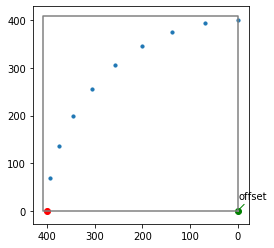

In [109]:
Ptemp = copy(P["B"])
Ptemp.properties.detector.offset = np.array([1,1]) #np.array([256*1.6]*2)*[0.5,0]
angle = np.deg2rad(59.0)
ring = get_ring(angle, rotations, Ptemp)
fig,axs = plot_ring(ring, angle, Ptemp)
outside = ring_outside(ring, Ptemp)
axs.plot(outside[:,0], outside[:,1], "x", color="black")

In [178]:
np.rad2deg(np.arctan(-4.26/240.18))

-1.0161313617939323

In [177]:
np.rad2deg(np.arctan((255.5*1.6 - 4.26)/240.18))

59.30191365802741

In [230]:
angles = np.rad2deg(np.arctan((np.linspace(0,255,256)+0.5 - 4.26)/204.18))

In [181]:
angles = np.linspace(np.arctan(-4.26/240.18), np.arctan((256*1.6-4.26)/240.18),256)
angles = np.rad2deg(angles)

In [231]:
with open("det256.txt", "w") as f:
    f.writelines("\n".join([str(v) for v in angles]))

In [110]:
rotations = make_rotations(np.linspace(0,90,901))

In [295]:
with open(f"({min(angles).astype(int)},{max(angles).astype(int)},1.0).txt", "w") as f:
    f.writelines("\n".join([str(v) for v in angles]))

In [96]:
path_ring = os.path.join(
    os.getcwd(), "UnityStuff", "Output", "testing", "ref", "[mode=2] ring coordinates.txt")

In [97]:
path_vcos = os.path.join(
    os.getcwd(), "UnityStuff", "Output", "testing", "ref", "[mode=2] vcosinv.txt")

In [98]:
ring_vcos = load(path_vcos, line_sep="\t", scalar=1)

In [99]:
ring_coordinates = load(path_ring, line_sep="\t")#.reshape((19,10,2))

In [114]:
ring_vcos[i]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

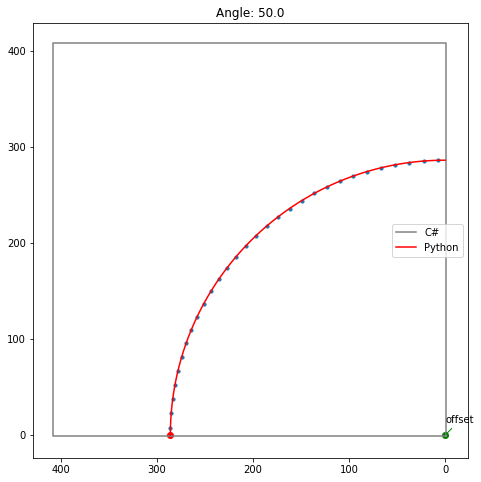

In [113]:
i = 50
Ptemp = copy(P["B"])
Ptemp.properties.detector.offset = np.array([1,1]) #np.array([256*1.6]*2)*[0.5,0]
angle = np.deg2rad(angles[i])
ring_gen = ring_coordinates[:,i,:]
ring = get_ring(angle, rotations, Ptemp)
fig,axs = plot_ring(ring_gen, angle, Ptemp, subplots_kwargs={"figsize":(8,8)})
axs.plot(ring[:,0], ring[:,1], "-", color="red")
axs.set_title(f"Angle: {angles[i]}")
axs.legend(["C#", "Python"])